## **Next-Generation Agricultural Market Forecasting and Insights System for Kenya**

### Business Understanding
### Business Overview

Kenya’s economic stability is intrinsically linked to the performance of its agricultural sector, which serves as both a primary GDP contributor and the backbone of livelihoods for millions of households. However, the sector continues to face structural inefficiencies characterized by persistent price volatility, fragmented market coordination, information asymmetry, and sentiment-driven demand fluctuations. These systemic challenges erode income predictability for farmers and traders, constrain value chain optimization, and ultimately weaken overall market resilience. In a data-driven global economy, the absence of real-time market intelligence and forward-looking analytics represents a critical strategic gap. Addressing this gap through an integrated, predictive market insights and forecasting system presents a transformative opportunity to enhance transparency, stabilize incomes, strengthen decision-making, and drive sustainable economic impact across Kenya’s agricultural ecosystem.
Stakeholders and Their Gains
Farmers (Small-Scale & Large-Scale)
Gains:
Informed decisions on when and where to sell their produce for maximum profit.
Insights into seasonal price trends to optimize crop production cycles.
Awareness of public sentiment that may impact market demand.


### Traders & Distributors (Wholesalers & Retailers)
#### Gains:
Forecasting tools to plan optimal buying and selling times.
Reduction in losses due to unexpected price drops.
Better logistics planning by analyzing regional price variations.

### Consumers (General Public)
#### Gains:
Awareness of expected price changes for household budgeting.
More stable prices due to better market efficiency.
Potential for lower food costs as market inefficiencies decrease.

### Problem Statement
Kenya’s agricultural markets exhibit pronounced price volatility across regions and commodity categories, creating significant uncertainty for market participants. These fluctuations are driven by seasonal production cycles, shifting demand patterns, regional supply imbalances, and evolving public perception. For example, staple commodities such as maize experience substantial temporal and geographic price disparities, directly influencing farmers’ commercialization strategies and revenue outcomes. Compounding these structural inefficiencies is the growing influence of digital public sentiment, particularly on social media platforms, which increasingly shapes market expectations and short-term demand behavior. The convergence of these factors results in a complex and opaque decision-making environment, limiting stakeholders’ ability to optimize pricing, distribution, and market timing strategies.

### Objectives
### Assess Commodity Price Fluctuations
* Evaluate the price volatility of various commodities across different regions and time periods
* Identify the factors contributing to price fluctuations, such as seasonal variations, market demand e.t.c.
### Analyze Market Trends:
* Monitor market trends and patterns in commodity prices using historical data and advanced analytics.
* Develop predictive models to forecast future market trends and price movements.


**DATA UNDERSTANDING**

The primary dataset contains Food Prices data for Kenya, sourced from the Kenya Agricultural Market Information System KAMIS, developed by the Ministry of Agriculture, Livestock, Fisheries, and Cooperatives. This database covers foods such as maize, rice, beans and beef, ,is updated daily(though mostly contains monthly data). The platform offers data on commodity prices, trade volumes, and market highlights

***Understanding rows and columns of our data***

In [126]:
#importing necessary libraries
import pandas as pd
import glob
import os
import warnings
import time
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
# importing custom scripts for different functions
sys.path.append('scripts')  # add scripts to path




# Ignore warnings
warnings.filterwarnings("ignore")

In [127]:
# Setting the directory containing our CSV files
csv_directory = ".\\data\\Products"  

# Use glob to match all CSV files in the directory
csv_files = glob.glob(os.path.join(csv_directory, '*.csv'))

# Initialize an empty list to hold DataFrames
data_frames = []

# Iterate over the list of CSV files
for file in csv_files:
    # Read each CSV file into a DataFrame
    df = pd.read_csv(file)
    # Append the DataFrame to the list
    data_frames.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)

# printing part of the combined dataframe
data = pd.read_csv("combined.csv")
data

,Commodity,Classification,Grade,Sex,Market,Wholesale,Retail,Supply Volume,County,Date
0,Banana (Ripening),-,-,-,Mukuyu Market,-,50.00/Kg,NaN,Muranga,2026-02-11
1,Banana (Ripening),-,-,-,Mulot,70.00/Kg,100.00/Kg,1500.0,Bomet,2026-02-11
2,Banana (Ripening),-,-,-,Kitale Municipality Market,80.00/Kg,100.00/Kg,6000.0,Trans-Nzoia,2026-02-11
3,Banana (Ripening),-,-,-,Kerugoya,20.00/Kg,40.00/Kg,300.0,Kirinyaga,2026-02-10
4,Banana (Ripening),-,-,-,Bondeni,80.00/Kg,100.00/Kg,5000.0,Trans-Nzoia,2026-02-10
...,...,...,...,...,...,...,...,...,...,...
57005,Beans (Yellow-Green),-,-,-,Molo,-,250.00/Kg,40.0,Nakuru,2024-02-01
57006,Beans (Yellow-Green),-,-,-,Nyeri open air,155.56/Kg,180.00/Kg,NaN,Nyeri,2024-01-31
57007,Beans (Yellow-Green),-,-,-,Makutano Kirinyaga,116.67/Kg,130.00/Kg,1600.0,Kirinyaga,2024-01-31
57008,Beans (Yellow-Green),-,-,-,Nakuru Wakulima,140.00/Kg,-,NaN,Nakuru,2024-01-31


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57010 entries, 0 to 57009
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Commodity       57010 non-null  object 
 1   Classification  57010 non-null  object 
 2   Grade           57010 non-null  object 
 3   Sex             57010 non-null  object 
 4   Market          57010 non-null  object 
 5   Wholesale       57010 non-null  object 
 6   Retail          57010 non-null  object 
 7   Supply Volume   39235 non-null  float64
 8   County          56991 non-null  object 
 9   Date            57010 non-null  object 
dtypes: float64(1), object(9)
memory usage: 4.3+ MB


In [129]:
data.isna().sum()

Commodity             0
Classification        0
Grade                 0
Sex                   0
Market                0
Wholesale             0
Retail                0
Supply Volume     17775
County               19
Date                  0
dtype: int64

In [130]:
data.duplicated().sum()

np.int64(4259)

In [131]:
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

In [132]:
data['County'] = data.groupby('Market')['County'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))

In [133]:
# Compute median values for each commodity
supply_medians = data.groupby('Commodity')[['Supply Volume']].median()

# Print median values before imputing
print(supply_medians)

# Function to impute missing values with median
def impute_supply_median(row):
    if pd.isna(row['Supply Volume']):
        row['Supply Volume'] = supply_medians.loc[row['Commodity'], 'Supply Volume']
    return row

# Apply imputation
data = data.apply(impute_supply_median, axis=1)

                             Supply Volume
Commodity                                 
Banana (Cooking)                    1500.0
Banana (Ripening)                   1500.0
Beans (Yellow-Green)                1500.0
Beans Red Haricot (Wairimu)         1200.0
Cabbages                            3500.0
Cowpea leaves (Kunde)                300.0
Cowpeas                              850.0
Dry Maize                           5000.0
Dry Onions                          2500.0
Finger Millet                        650.0
Kales/Sukuma Wiki                    900.0
Maize Flour                         3876.0
Meat Beef                           1300.0
Omena                               1200.0
Red Irish potato                    3000.0
Red Sorghum                          650.0
Rice                                2200.0
Spinach                              460.0
Wheat                                630.0


In [134]:
data.isnull().sum()

Commodity         0
Classification    0
Grade             0
Sex               0
Market            0
Wholesale         0
Retail            0
Supply Volume     0
County            0
Date              0
dtype: int64

In [135]:
data['Date'] = pd.to_datetime(data['Date'])

In [136]:
data= data.drop(columns=["Classification", "Grade", "Sex"])

In [137]:
data.head()

,Commodity,Market,Wholesale,Retail,Supply Volume,County,Date
0,Banana (Ripening),Mukuyu Market,-,50.00/Kg,1500.0,Muranga,2026-02-11
1,Banana (Ripening),Mulot,70.00/Kg,100.00/Kg,1500.0,Bomet,2026-02-11
2,Banana (Ripening),Kitale Municipality Market,80.00/Kg,100.00/Kg,6000.0,Trans-Nzoia,2026-02-11
3,Banana (Ripening),Kerugoya,20.00/Kg,40.00/Kg,300.0,Kirinyaga,2026-02-10
4,Banana (Ripening),Bondeni,80.00/Kg,100.00/Kg,5000.0,Trans-Nzoia,2026-02-10


In [138]:
data.isnull().sum()

Commodity        0
Market           0
Wholesale        0
Retail           0
Supply Volume    0
County           0
Date             0
dtype: int64

In [139]:
def clean_price(series):
	clean_series = pd.to_numeric(series.astype(str).str.replace('[^0-9.]', '', regex=True), errors='coerce')
	return clean_series

data["Wholesale"] = clean_price(data["Wholesale"])
data["Retail"] = clean_price(data["Retail"])

In [140]:
data.isnull().sum()

Commodity            0
Market               0
Wholesale        11061
Retail            2194
Supply Volume        0
County               0
Date                 0
dtype: int64

In [141]:
data["Wholesale"] = data["Wholesale"].fillna(0)
data["Retail"] = data["Retail"].fillna(0)
data.isnull().sum()

Commodity        0
Market           0
Wholesale        0
Retail           0
Supply Volume    0
County           0
Date             0
dtype: int64

In [142]:
# Calculate absolute price difference
data['Price_Margin'] = data['Retail'] - data['Wholesale']
data = data[data['Wholesale'] > 0].copy()
# Calculate percentage margin, handling division by zero
data['Margin_Percentage'] = (data['Price_Margin'] / data['Wholesale']) * 100

In [143]:
for col in ['Retail', 'Wholesale']:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41690 entries, 1 to 52750
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Commodity          41690 non-null  object        
 1   Market             41690 non-null  object        
 2   Wholesale          41690 non-null  float64       
 3   Retail             41690 non-null  float64       
 4   Supply Volume      41690 non-null  float64       
 5   County             41690 non-null  object        
 6   Date               41690 non-null  datetime64[ns]
 7   Price_Margin       41690 non-null  float64       
 8   Margin_Percentage  41690 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 3.2+ MB


#### Which are Top 10 Commodities by Average Margin Percentage?

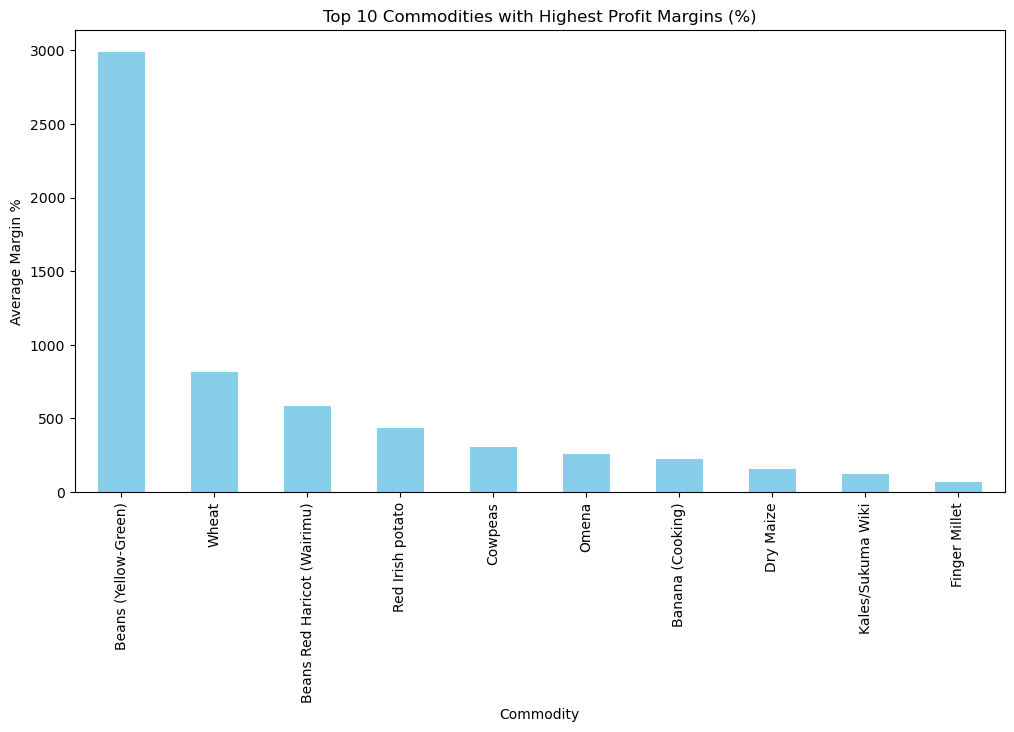

In [144]:
plt.figure(figsize=(12, 6))
data.groupby('Commodity')['Margin_Percentage'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Commodities with Highest Profit Margins (%)')
plt.ylabel('Average Margin %')
plt.show()

#### Which are Top 10 Counties by Total Supply Volume?

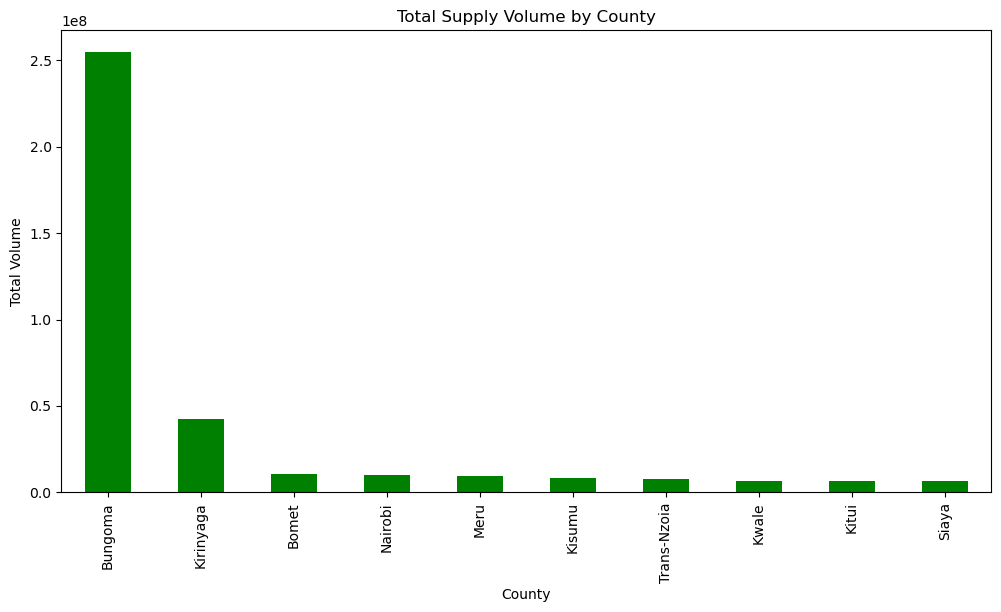

In [145]:
plt.figure(figsize=(12, 6))
data.groupby('County')['Supply Volume'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='green')
plt.title('Total Supply Volume by County')
plt.ylabel('Total Volume')
plt.show()

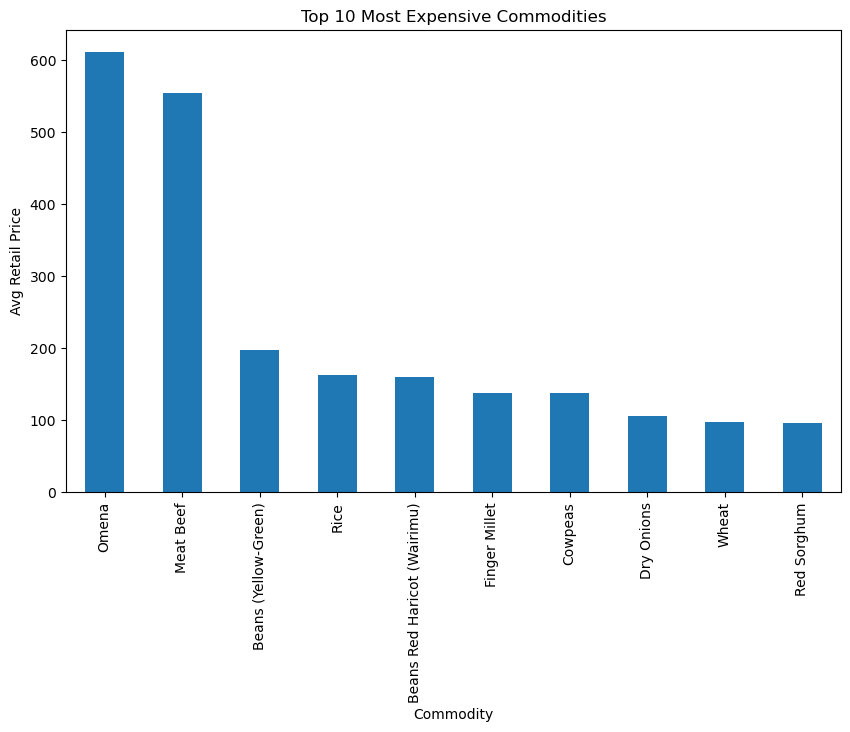

In [146]:
plt.figure(figsize=(10,6))
data.groupby('Commodity')['Retail'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel("Avg Retail Price")
plt.title("Top 10 Most Expensive Commodities")
plt.show()

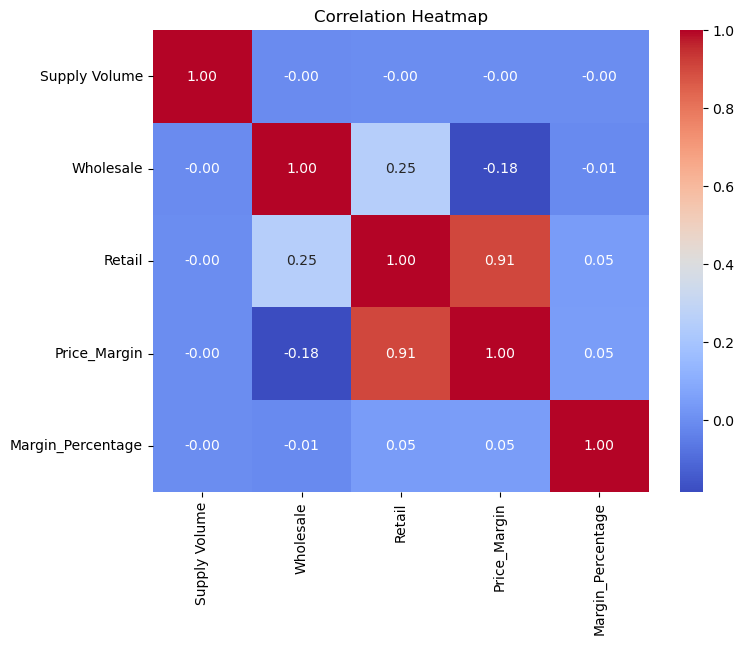

In [147]:
plt.figure(figsize=(8, 6))
correlation = data[['Supply Volume', 'Wholesale', 'Retail', 'Price_Margin', 'Margin_Percentage']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [148]:
# Sorting data by Date and Commodity
data = data.sort_values(['Commodity', 'Date'])

# Using linear interpolation to fill gaps in price trends
data['Retail'] = data.groupby(['Market', 'Commodity'])['Retail'].transform(lambda x: x.interpolate(method='linear'))
data['Wholesale'] = data.groupby(['Market', 'Commodity'])['Wholesale'].transform(lambda x: x.interpolate(method='linear'))

In [149]:
# Calculate Coefficient of Variation - a measure of volatility
volatility = data.groupby(['Market', 'Commodity'])['Retail'].std() / data.groupby('Commodity')['Retail'].mean()
print("Top 5 Most Volatile Commodities (Hardest to predict):")
print(volatility.sort_values(ascending=False).head())

Top 5 Most Volatile Commodities (Hardest to predict):
Market                    Commodity                  
Lungalunga                Banana (Cooking)               61.967454
                          Dry Maize                      35.350013
Chepterit Market - Nandi  Dry Maize                      21.463823
Musoli Market             Beans Red Haricot (Wairimu)    18.775163
Nyamakima                 Wheat                          18.608361
Name: Retail, dtype: float64


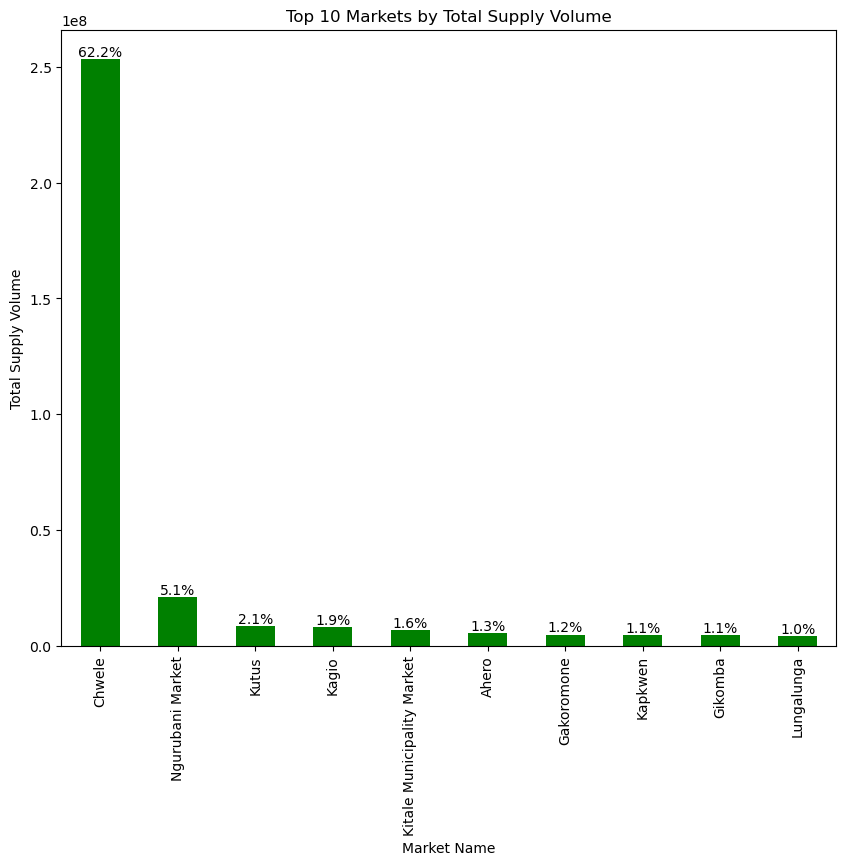

In [150]:
plt.figure(figsize=(10,8))
df1 = data.groupby('Market')['Supply Volume'].sum().sort_values(ascending=False)
df1.head(10).plot(kind='bar', color='green')
plt.xlabel("Market Name")
plt.ylabel("Total Supply Volume")
plt.title('Top 10 Markets by Total Supply Volume')
total = data.groupby('Market')['Supply Volume'].sum().sum()
for i, rate in enumerate(df1.head(10)):
   plt.text(
        i,
        rate,
        f"{rate/total:.1%}",
        ha='center',
        va='bottom',
        fontsize=10
    );

In [151]:
# Creating a list of markets for major cities
Nairobi_data = data[data['County'].str.contains('Nairobi', case=False, na=False)]


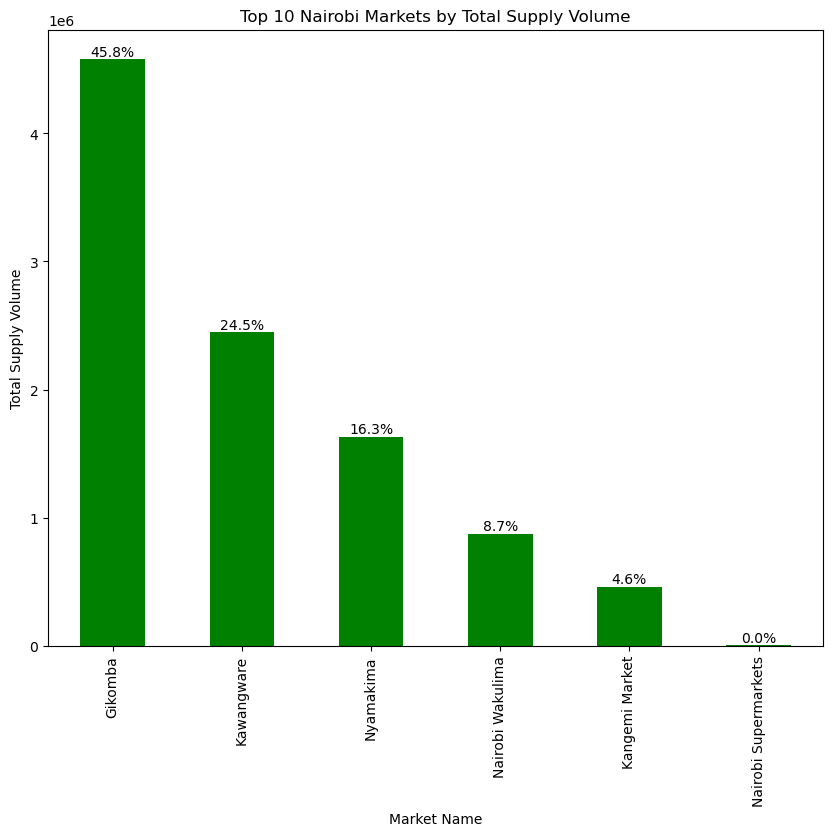

In [152]:
plt.figure(figsize=(10,8))
df2=Nairobi_data.groupby('Market')['Supply Volume'].sum().sort_values(ascending=False)
df2.head(10).plot(kind='bar', color='green')
plt.xlabel("Market Name")
plt.ylabel("Total Supply Volume")
plt.title('Top 10 Nairobi Markets by Total Supply Volume')
total = Nairobi_data.groupby('Market')['Supply Volume'].sum().sum()
for i, rate in enumerate(df2.head(10)):
   plt.text(
        i,
        rate,
        f"{rate/total:.1%}",
        ha='center',
        va='bottom',
        fontsize=10
    );

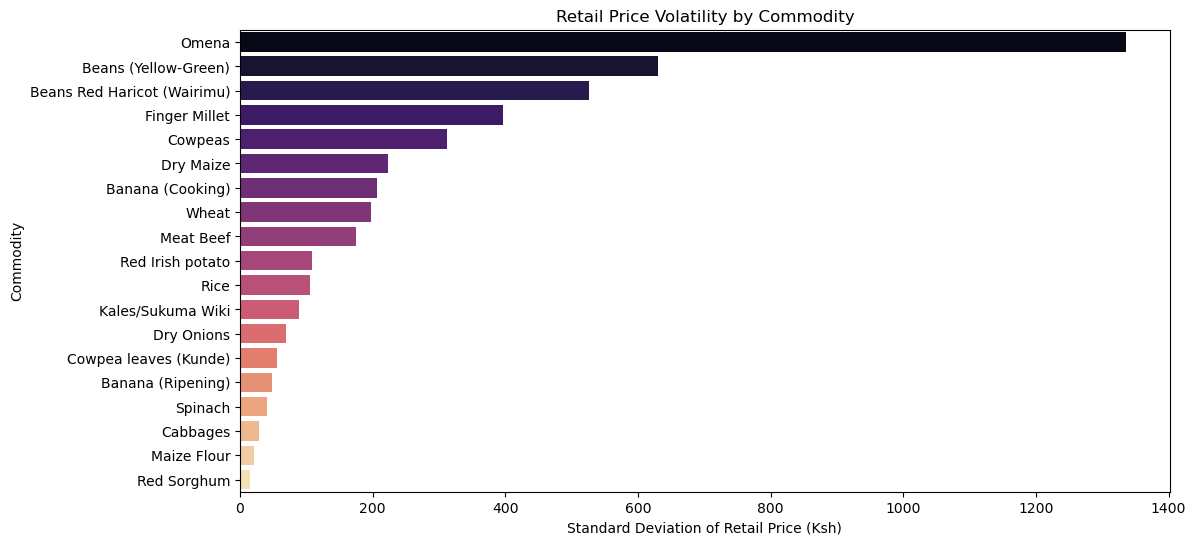

In [153]:
# Compute Volatility per Commodity 
volatility = data.groupby('Commodity')['Retail'].std().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=volatility.values, y=volatility.index, palette="magma")
plt.title("Retail Price Volatility by Commodity")
plt.xlabel("Standard Deviation of Retail Price (Ksh)")
plt.ylabel("Commodity")
plt.show()

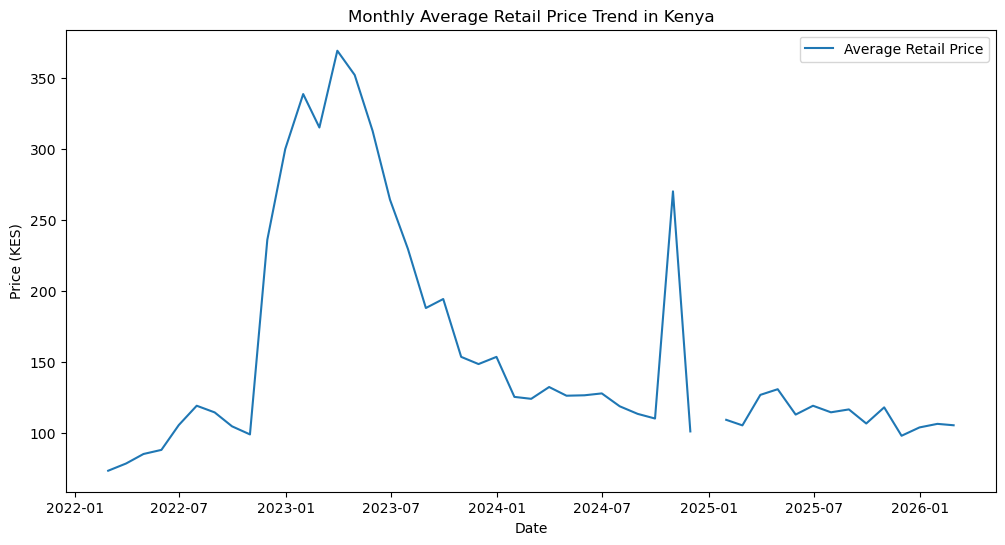

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# Resample to monthly frequency to see smoother trends
# We aggregate by taking the mean retail price per day/month
ts_data = data.set_index('Date').resample('M')['Retail'].mean()

plt.figure(figsize=(12, 6))
plt.plot(ts_data, label='Average Retail Price')
plt.title('Monthly Average Retail Price Trend in Kenya')
plt.xlabel('Date')
plt.ylabel('Price (KES)')
plt.legend()
plt.show()


In [158]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month

In [169]:
monthly_data = data.groupby([
    'Commodity', 
    'County', 
    pd.Grouper(key='Date', freq='MS')
])['Retail'].mean().reset_index()

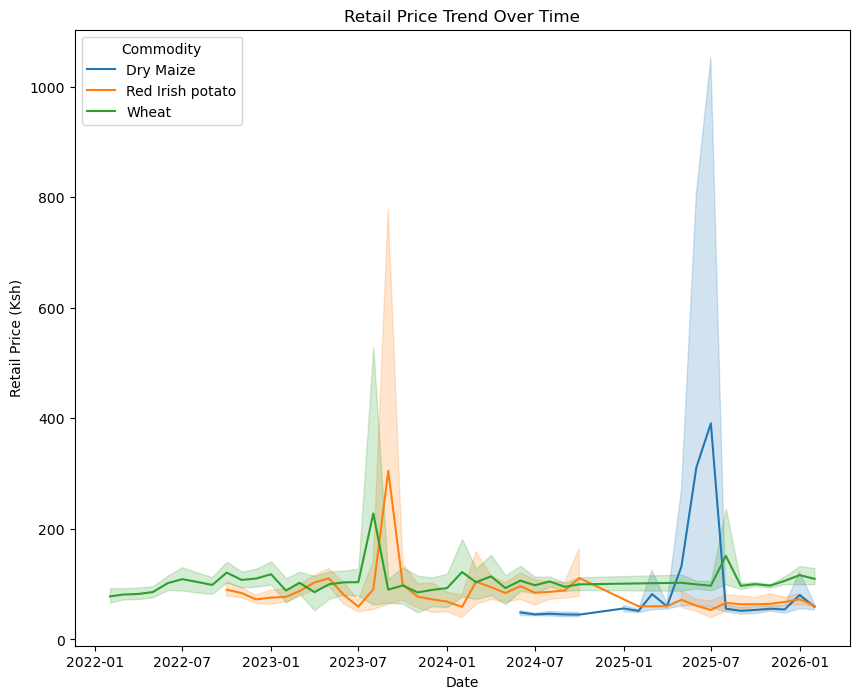

In [170]:
key_commodities = ["Red Irish potato","Wheat","Dry Maize"]
subset = monthly_data[monthly_data['Commodity'].isin(key_commodities)]
plt.figure(figsize=(10,8))
sns.lineplot(data=subset, x='Date', y='Retail', hue='Commodity')
plt.title("Retail Price Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Retail Price (Ksh)")
plt.show()

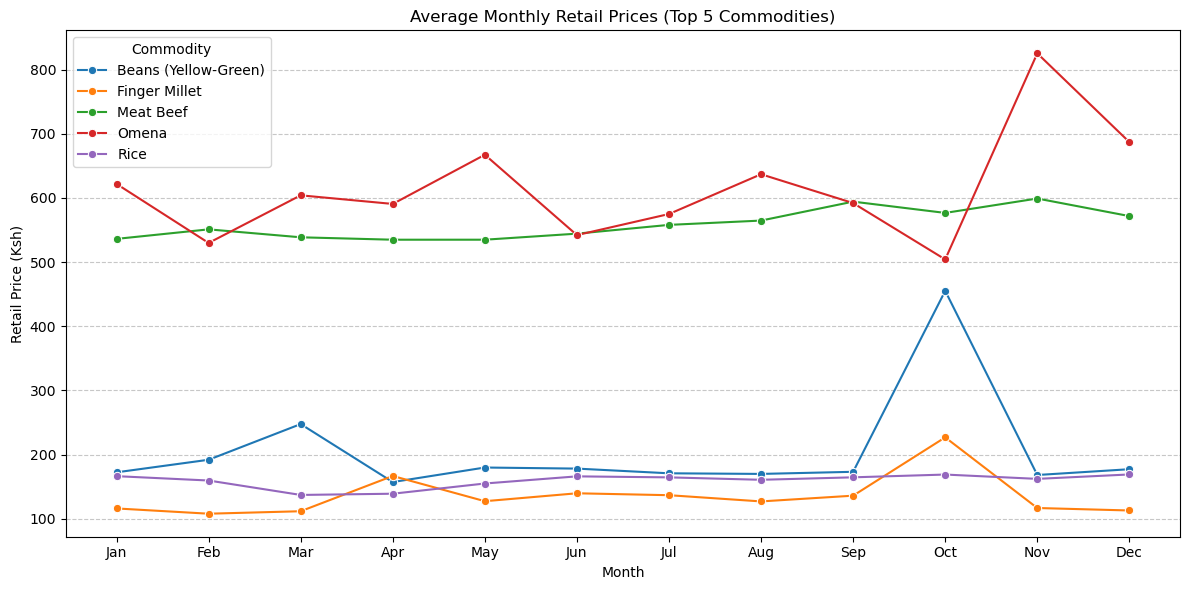

In [172]:
top_5 = monthly_data.groupby('Commodity')['Retail'].mean().sort_values(ascending=False).head(5).index
seasonal_pattern = data.groupby(['Commodity', 'Month'])['Retail'].mean().reset_index()
seasonal_subset = seasonal_pattern[
    seasonal_pattern['Commodity'].isin(top_5)
]

plt.figure(figsize=(12,6))
sns.lineplot(data=seasonal_subset, x='Month', y='Retail', hue='Commodity', marker='o')

plt.title("Average Monthly Retail Prices (Top 5 Commodities)")
plt.xlabel("Month")
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.ylabel("Retail Price (Ksh)")

plt.tight_layout()
plt.show()